# Exemplo prático do algoritmo Random Forest aplicado à base de dados Iris. 
Usaremos a biblioteca Scikit-learn com a base de dados Iris, uma das mais conhecidas para classificação.

Temos a leitura dos dados, processamento, treinamento, valização e por fim, com o modelo treinado, faremos a classificação de novos dados e assim, será retornado qual classe ele pertence

### 01. Dependências e importações

#### Dependências

In [60]:
# !pip install pandas scikit-learn

#### Importações das bibliotecas necessárias

In [ ]:
# Importação de bibliotecas
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import ConfusionMatrixDisplay # Matriz de confusão

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseados no matplotlib


### 02. Carregar o dataset Iris


In [62]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [63]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
print(f"O dataset df_iris possui {df_iris.shape[0]} linhas e {df_iris.shape[1]} colunas.")
print("iris é apenas um DataFrame com os dados do dataset Iris. Não será utilizado em nenhuma fase do projeto. Apenas foi aqui criado para mostrar o dataset.")
df_iris.head()

O dataset df_iris possui 150 linhas e 4 colunas.
iris é apenas um DataFrame com os dados do dataset Iris. Não será utilizado em nenhuma fase do projeto. Apenas foi aqui criado para mostrar o dataset.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
print(f"O dataset X possui {X.shape[0]} linhas e {X.shape[1]} colunas.")
print("X é o DataFrame que contém as características das flores no dataset Iris.")
X.head()

O dataset X possui 150 linhas e 4 colunas.
X é o DataFrame que contém as características das flores no dataset Iris.


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
print(f"O array y possui {len(y)} elementos.")
print("y é o array de rótulos das classes das flores no dataset Iris.")
y

O array y possui 150 elementos.
y é o array de rótulos das classes das flores no dataset Iris.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 03. Divisão dos dados em treino e teste

In [34]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Calcular a porcentagem de dados utilizados para treinamento
train_percentage = (X_train.shape[0] / X.shape[0]) * 100
# Calcular a porcentagem de dados utilizados para teste
test_percentage = (X_test.shape[0] / X.shape[0]) * 100
print(f"{train_percentage:.2f}% dos dados estão sendo utilizados para treinamento.")
print(f"{test_percentage:.2f}% dos dados estão sendo utilizados para teste.")


X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)
70.00% dos dados estão sendo utilizados para treinamento.
30.00% dos dados estão sendo utilizados para teste.


### 04. Criar e treinar o modelo Random Forest

In [36]:
# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 05. Realizar previsões

In [ ]:
# Realizar previsões
y_pred = model.predict(X_test)

### 06. Avaliação do modelo

#### 6.1 Acurária
Medimos aqui aqui qual relação dos dados de testes classificados de forma correta em relação ao total de dados de testes 

In [70]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)

total_test_data = len(y_test)
correctly_classified = sum(y_test == y_pred)

print(f"Total de dados utilizados para testes: {total_test_data}")
print(f"Total de dados classificados corretamente: {correctly_classified}")
print(f"Acurácia do modelo: {accuracy * 100:.2f}%")



Total de dados utilizados para testes: 45
Total de dados classificados corretamente: 45
Acurácia do modelo: 100.00%


#### 6.2 Relatório de classificação 

1. Precision (Precisão): Mede o quão confiáveis são as previsões positivas para cada classe. Alta precisão significa poucos falsos positivos.
2. Recall (Revocação/Sensibilidade): Mede a capacidade de detectar corretamente os exemplos de uma classe. Alta revocação significa poucos falsos negativos.
3. F1-Score: Média harmônica entre precisão e recall. Útil quando é necessário um equilíbrio entre as duas métricas.
4. Support (Suporte): Número de exemplos reais de cada classe no conjunto de teste.

In [74]:
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



##### Melorias visuais na apresentação do relatório de classificação - Visualizações gráficas. 



C:\Users\danil\AppData\Local\Temp\ipykernel_35980\773655836.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes][metric], palette="viridis")
C:\Users\danil\AppData\Local\Temp\ipykernel_35980\773655836.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes][metric], palette="viridis")
C:\Users\danil\AppData\Local\Temp\ipykernel_35980\773655836.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.loc[classes].index, y=repo

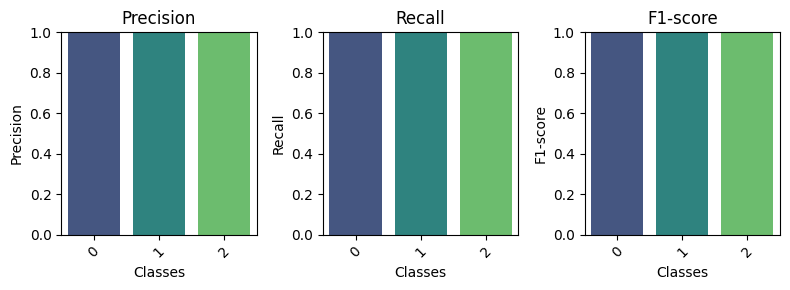

In [85]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Geração do relatório como dicionário
report = classification_report(y_test, y_pred, output_dict=True)

# Transformar em DataFrame para visualização
report_df = pd.DataFrame(report).transpose()

# Filtrar apenas as classes (ignorando 'accuracy', 'macro avg', etc.)
classes = report_df.index[:-3]  # Ignorar últimas linhas gerais (accuracy, macro avg)

# Gráficos de barras para Precision, Recall e F1-Score
plt.figure(figsize=(8, 3))
metrics = ['precision', 'recall', 'f1-score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=report_df.loc[classes].index, y=report_df.loc[classes][metric], palette="viridis")
    plt.title(metric.capitalize())
    plt.xlabel("Classes")
    plt.ylabel(metric.capitalize())
    plt.ylim(0, 1)  # Escala de 0 a 1
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


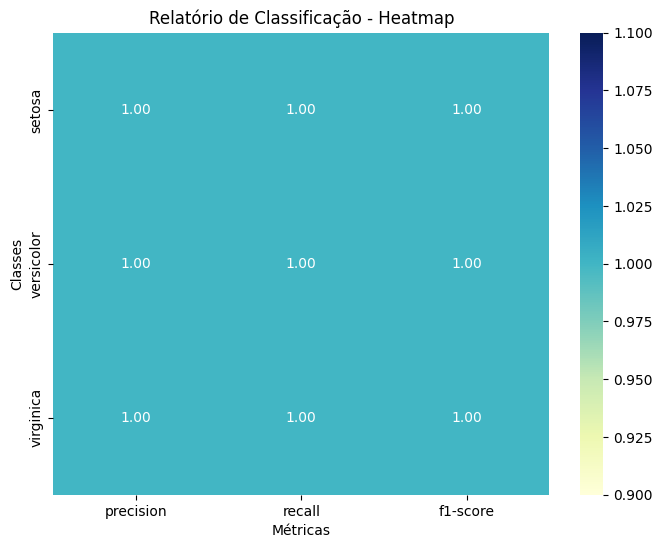

In [80]:
# Gráfico Heatmap
plt.figure(figsize=(8, 6))
# Gerar o relatório de classificação
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Definir as classes e métricas para o heatmap
classes = iris.target_names
metrics = ['precision', 'recall', 'f1-score']

# Plotar o heatmap
sns.heatmap(report_df.loc[classes][metrics], annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")
plt.title("Relatório de Classificação - Heatmap")
plt.ylabel("Classes")
plt.xlabel("Métricas")
plt.show()


#### 6.3 Matriz de Confusão


Matriz de Confusão:
Mostra as previsões corretas e incorretas para cada classe.


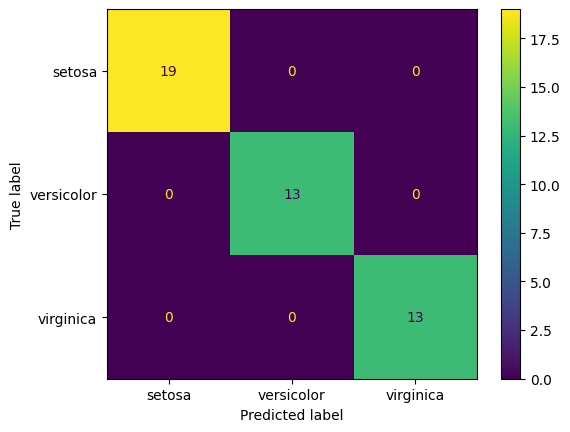

In [72]:
# Plotar matriz de confusão
print("\nMatriz de Confusão:")
print("Mostra as previsões corretas e incorretas para cada classe.")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=iris.target_names)

Percebemos aqui que todos os dados reais (linhas) foram classificados de forma correta (colunas). Por exemplo: 
- 19 setosas foram classificadas (linhas, sendo reais) foram classificadas como setosa (coluna, sendo o resultado).
- Nenhuma Virginica (real, linha) foi classificada como setesa ou versiolor (preditas, colunas)

#### 6.4 Curva ROC e AUC

Avalia o desempenho do modelo em diferentes limiares de decisão.

Mede a capacidade do modelo de separar classes.

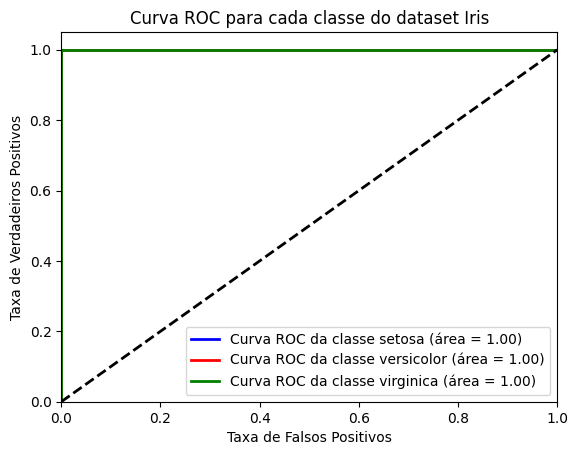

In [ ]:

# Binarizar as classes para calcular a ROC AUC
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])

# Calcular a ROC AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar a Curva ROC para cada classe
plt.figure()
colors = ['blue', 'red', 'green']
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Curva ROC da classe {0} (área = {1:0.2f})'
             ''.format(iris.target_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para cada classe do dataset Iris')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Calcular a pontuação ROC AUC para cada classe
roc_auc_scores = {}
for i in range(3):
    roc_auc_scores[iris.target_names[i]] = roc_auc_score(y_test_binarized[:, i], y_pred_binarized[:, i])

# Exibir os resultados
print("Pontuação ROC AUC para cada classe:")
for class_name, score in roc_auc_scores.items():
    print(f"{class_name}: {score:.2f}")

Pontuação ROC AUC para cada classe:
setosa: 1.00
versicolor: 1.00
virginica: 1.00


#### 6.5 Importância das Características
Mostra quais atributos são mais relevantes para o modelo.
Especialmente útil em algoritmos como Random Forest.


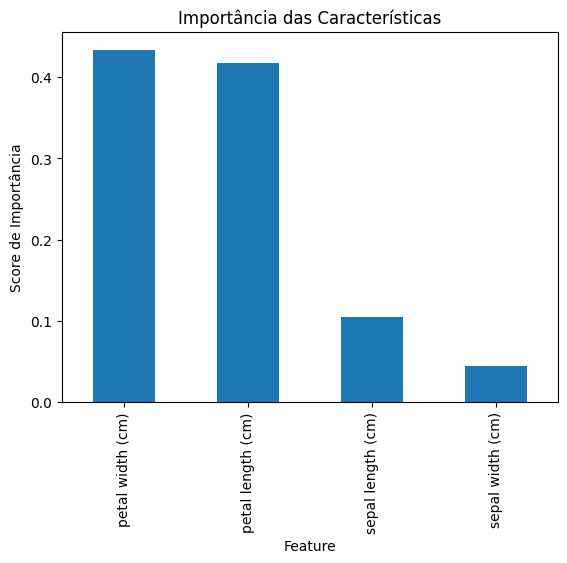

In [78]:

# Importância das características
feature_importances = model.feature_importances_
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualização
importances_df.plot.bar(x='Feature', y='Importance', legend=False, title="Importância das Características")
plt.ylabel("Score de Importância")
plt.show()


#### 6.6 Distribuição de Erros


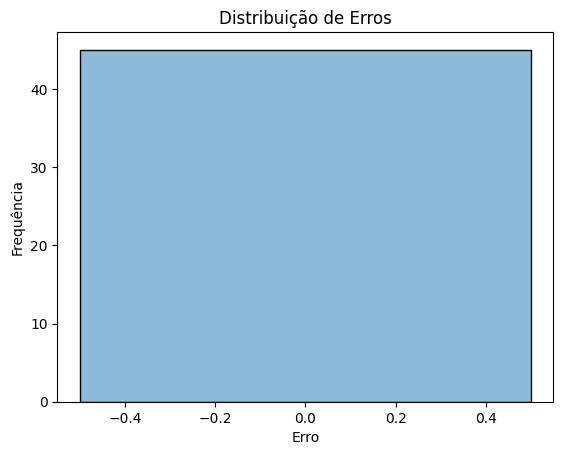

In [ ]:


# Diferença entre previsões e valores reais
errors = y_test - y_pred

# Plotar distribuição de erros
sns.histplot(errors, kde=True)
plt.title("Distribuição de Erros")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.show()


## Classificando novos valores com o modelo treinado. 

### 07. Função para classificar uma nova amostra com o Predict

In [40]:
# Função para classificar uma nova amostra
def classify_new_iris(new_data):
    """
    Classifica uma nova amostra de flor Iris.
    Args:
        new_data (list): Lista contendo os valores de comprimento e largura de sépala e pétala.
    Returns:
        str: Nome da classe prevista (setosa, versicolor ou virginica).
    """
    predicted_class = model.predict([new_data])[0]  # Previsão da classe
    class_name = iris.target_names[predicted_class]  # Obter o nome da classe
    return f"A flor pertence à classe: {class_name}"

### 08. Exemplo de uso com uma nova flor

In [58]:
# Exemplo de uso com uma nova flor
new_iris = [1.0, 2.6, 0.4, 0.2]  # Comprimento/largura de sépala e pétala
result = classify_new_iris(new_iris)
print("\nNova Previsão:")
print(result)

new_iris = [5.7, 3.0, 5.1, 1.8]  # Comprimento/largura de sépala e pétala
result = classify_new_iris(new_iris)
print("\nNova Previsão:")
print(result)



Nova Previsão:
A flor pertence à classe: setosa

Nova Previsão:
A flor pertence à classe: virginica


c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\danil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
